### Подключение модулей

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import tensorflow as tf
from tensorflow import keras

Целью этого проекта является прогнозирование и анализ цен продажи жилья в США. Требуется построить регрессионную модель для прогнозирования цен на жилье в США на основе различных факторов.


### Загрузка данных

In [5]:
df = pd.read_csv('USA_Housing.csv')

In [6]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Данные содержат следующие столбцы:
- __Avg. Area Income__ (Сред. Доход от района): Средний доход жителей города по региону.
- __Avg. Area House Age__ (Сред. Площадь дома): Средний возраст домов в районе.
- __Avg. Area Number of Rooms__ (Сред. Площадь Количество комнат): Среднее количество комнат в домах в том же городе.
- __Avg. Area Number of Bedrooms__ (Сред. Площадь Количество спален): Среднее количество спален в домах в том же городе.
- __Area Population__ (Население региона): Население городского дома, в котором находится.
- __Price__ (Цена): Цена, по которой был продан дом.
- __Address__ (Адрес): Адрес дома.
    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [9]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [10]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000
mean,68583.1090,5.9772,6.9878,3.9813,36163.5160,1232072.6541
std,10657.9912,0.9915,1.0058,1.2341,9925.6501,353117.6266
min,17796.6312,2.6443,3.2362,2.0000,172.6107,15938.6579
25%,61480.5624,5.3223,6.2993,3.1400,29403.9287,997577.1350
50%,68804.2864,5.9704,7.0029,4.0500,36199.4067,1232669.3780
75%,75783.3387,6.6508,7.6659,4.4900,42861.2908,1471210.2042
max,107701.7484,9.5191,10.7596,6.5000,69621.7134,2469065.5942


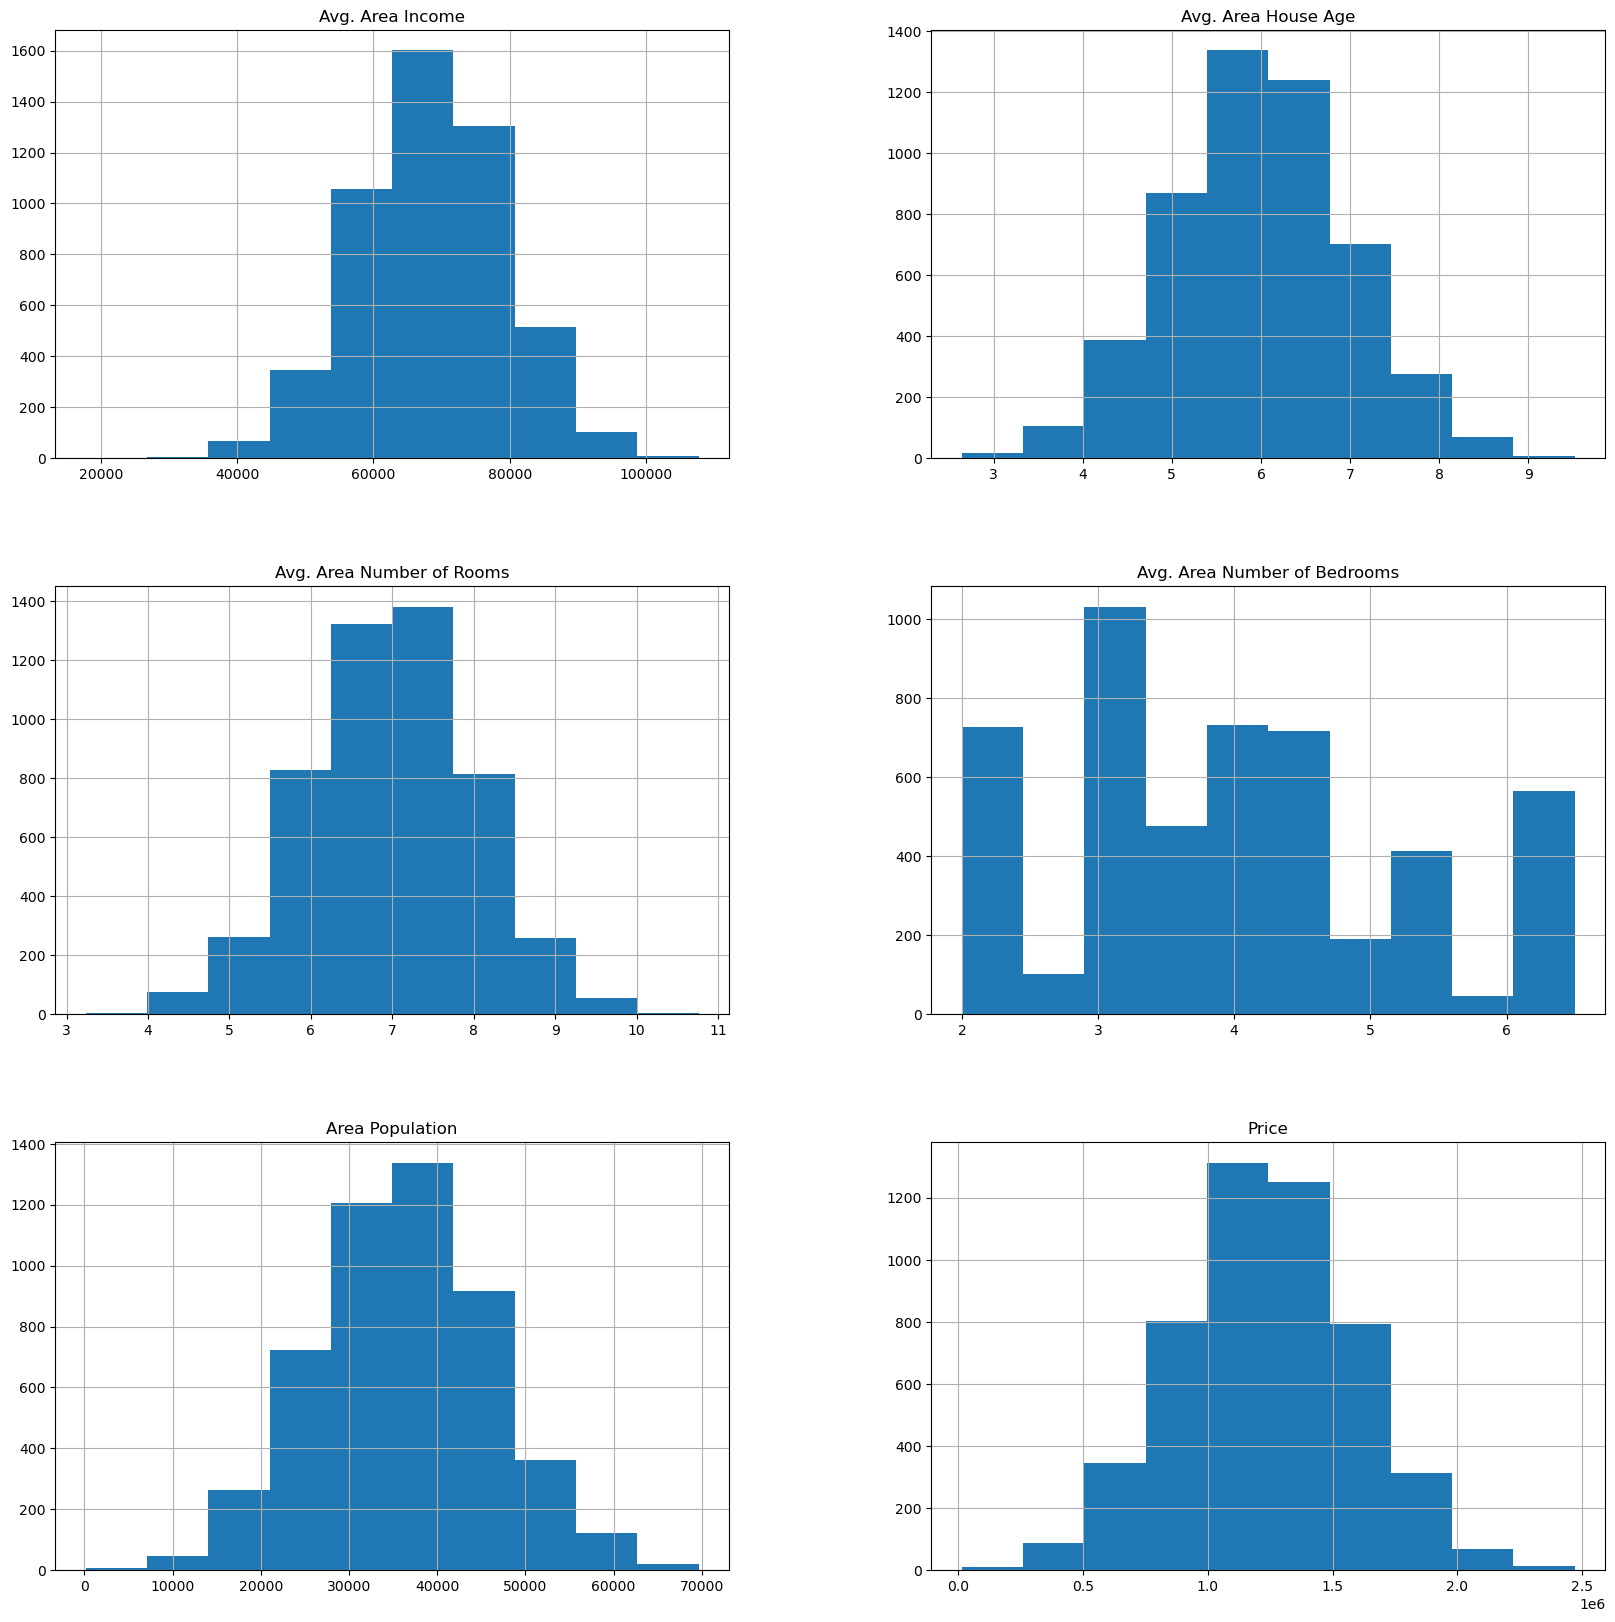

In [11]:
df.hist(figsize=(20,20));

In [12]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

Error in callback <function _draw_all_if_interactive at 0x000001744C9DE3E0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

<Figure size 800x600 with 0 Axes>

Error in callback <function flush_figures at 0x000001744ED6DF80> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

<Axes: xlabel='Price', ylabel='Density'>

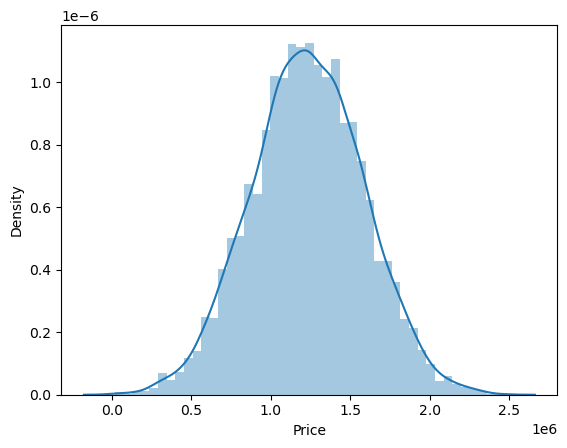

In [13]:
sns.distplot(df['Price'])

<Axes: xlabel='Avg. Area Income', ylabel='Price'>

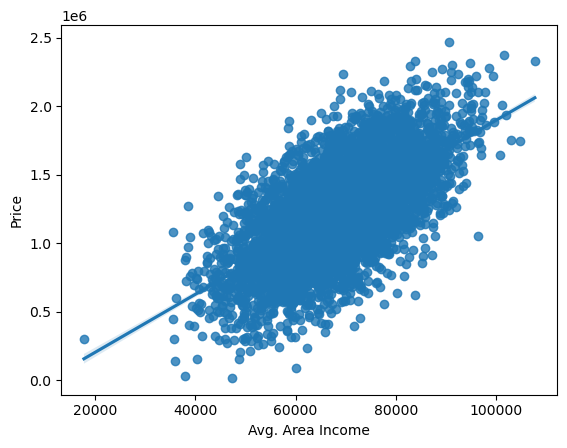

In [14]:
sns.regplot(y='Price', x='Avg. Area Income', data=df)

In [15]:
df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.0000,-0.0020,-0.0110,0.0198,-0.0162,0.6397
Avg. Area House Age,-0.0020,1.0000,-0.0094,0.0061,-0.0187,0.4525
Avg. Area Number of Rooms,-0.0110,-0.0094,1.0000,0.4627,0.0020,0.3357
Avg. Area Number of Bedrooms,0.0198,0.0061,0.4627,1.0000,-0.0222,0.1711
Area Population,-0.0162,-0.0187,0.0020,-0.0222,1.0000,0.4086
Price,0.6397,0.4525,0.3357,0.1711,0.4086,1.0000


<Axes: >

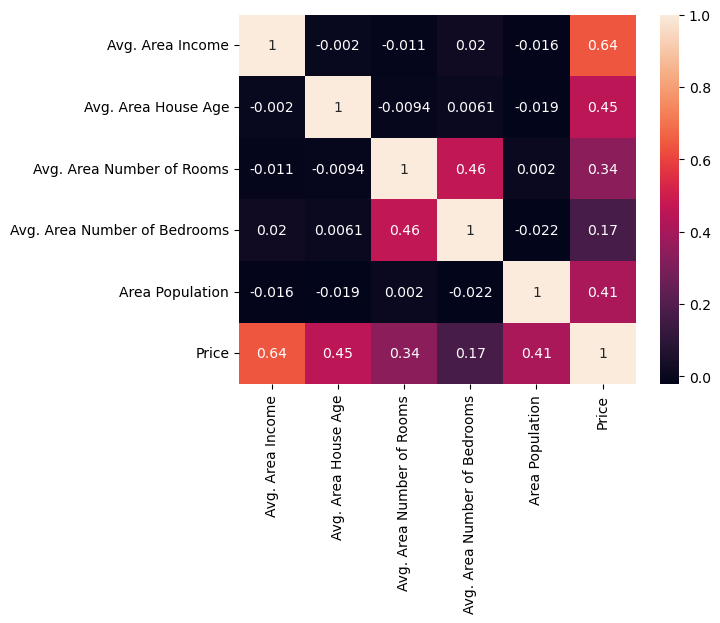

In [16]:
sns.heatmap(df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr(), annot=True)

In [17]:
df['House Age'] = df['Avg. Area House Age'].apply(int)

<Axes: xlabel='House Age', ylabel='Price'>

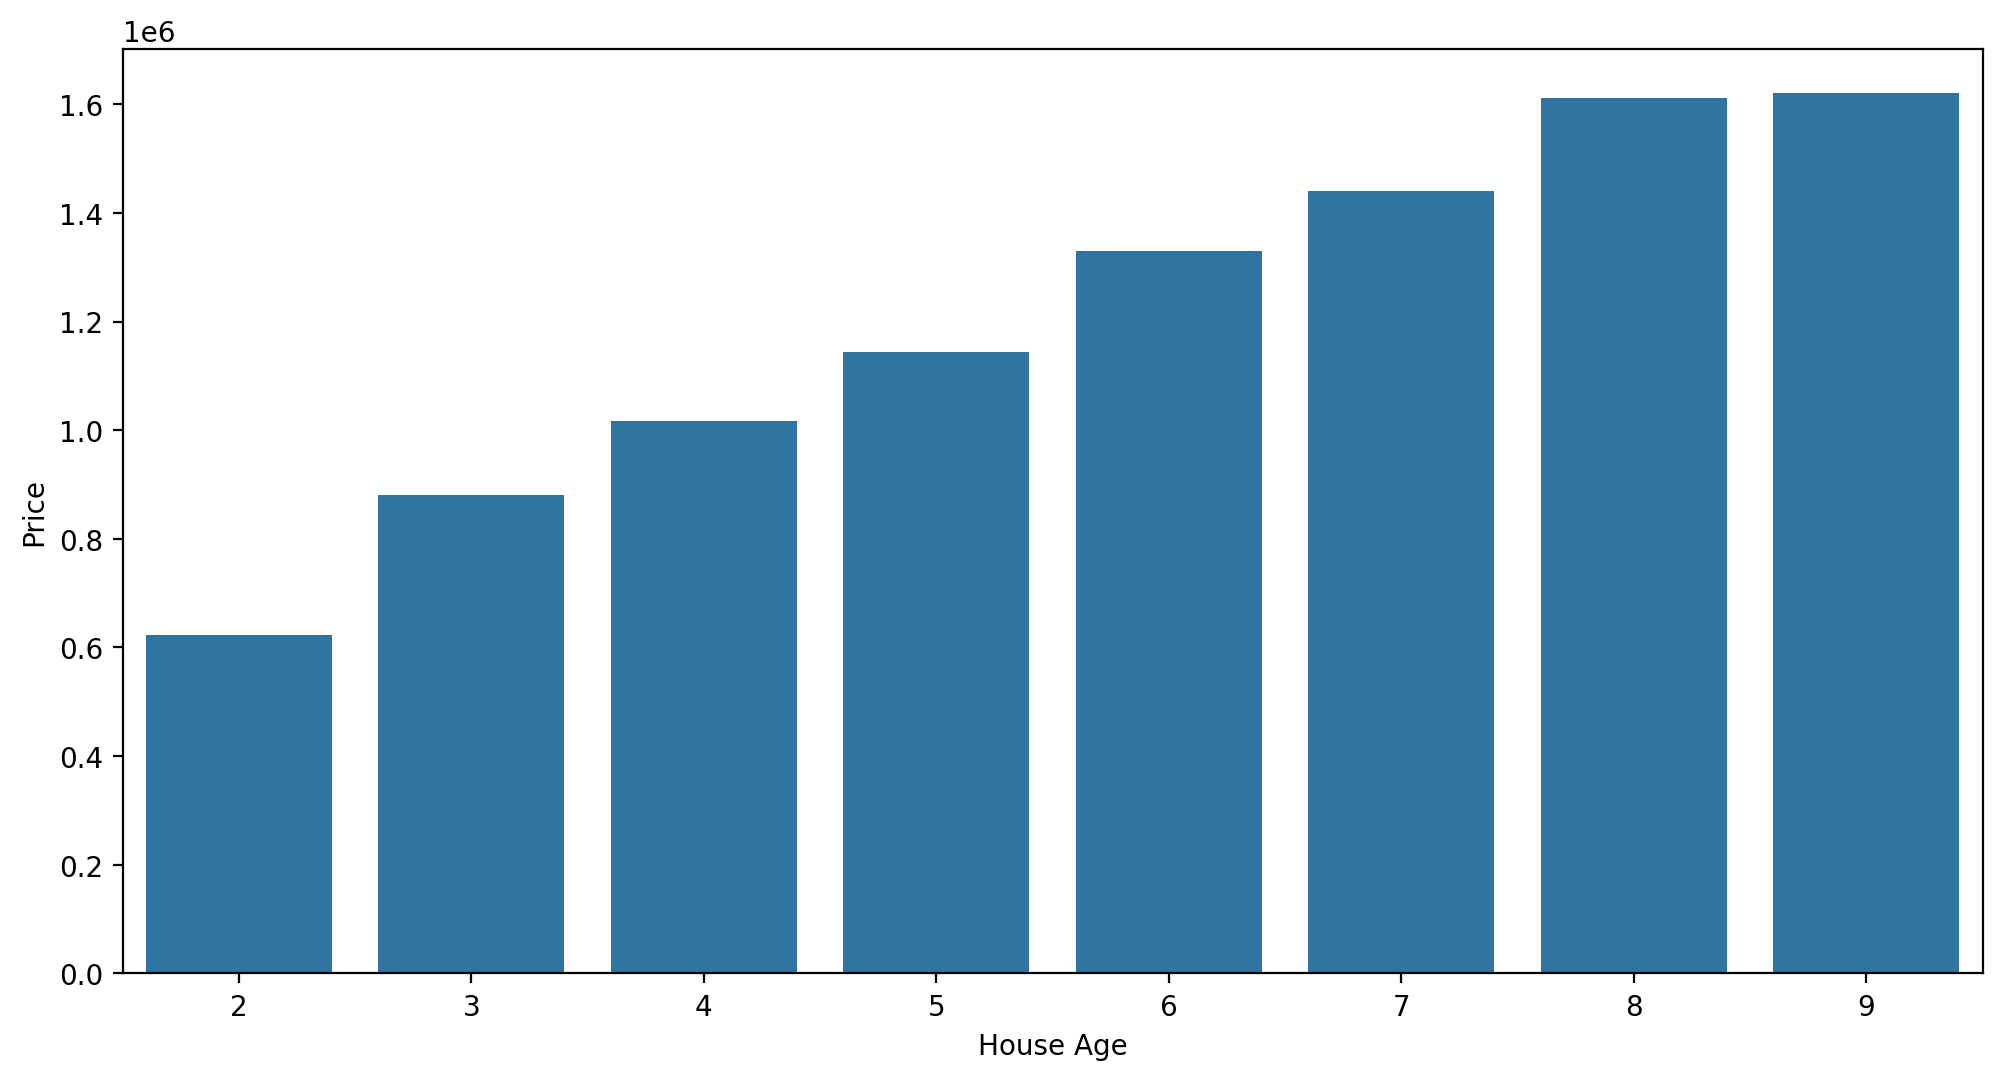

In [18]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'House Age', y = 'Price', data = df, ci = None)

In [19]:
df['Number of Rooms'] = df['Avg. Area Number of Rooms'].apply(int)

<Axes: xlabel='Number of Rooms', ylabel='Price'>

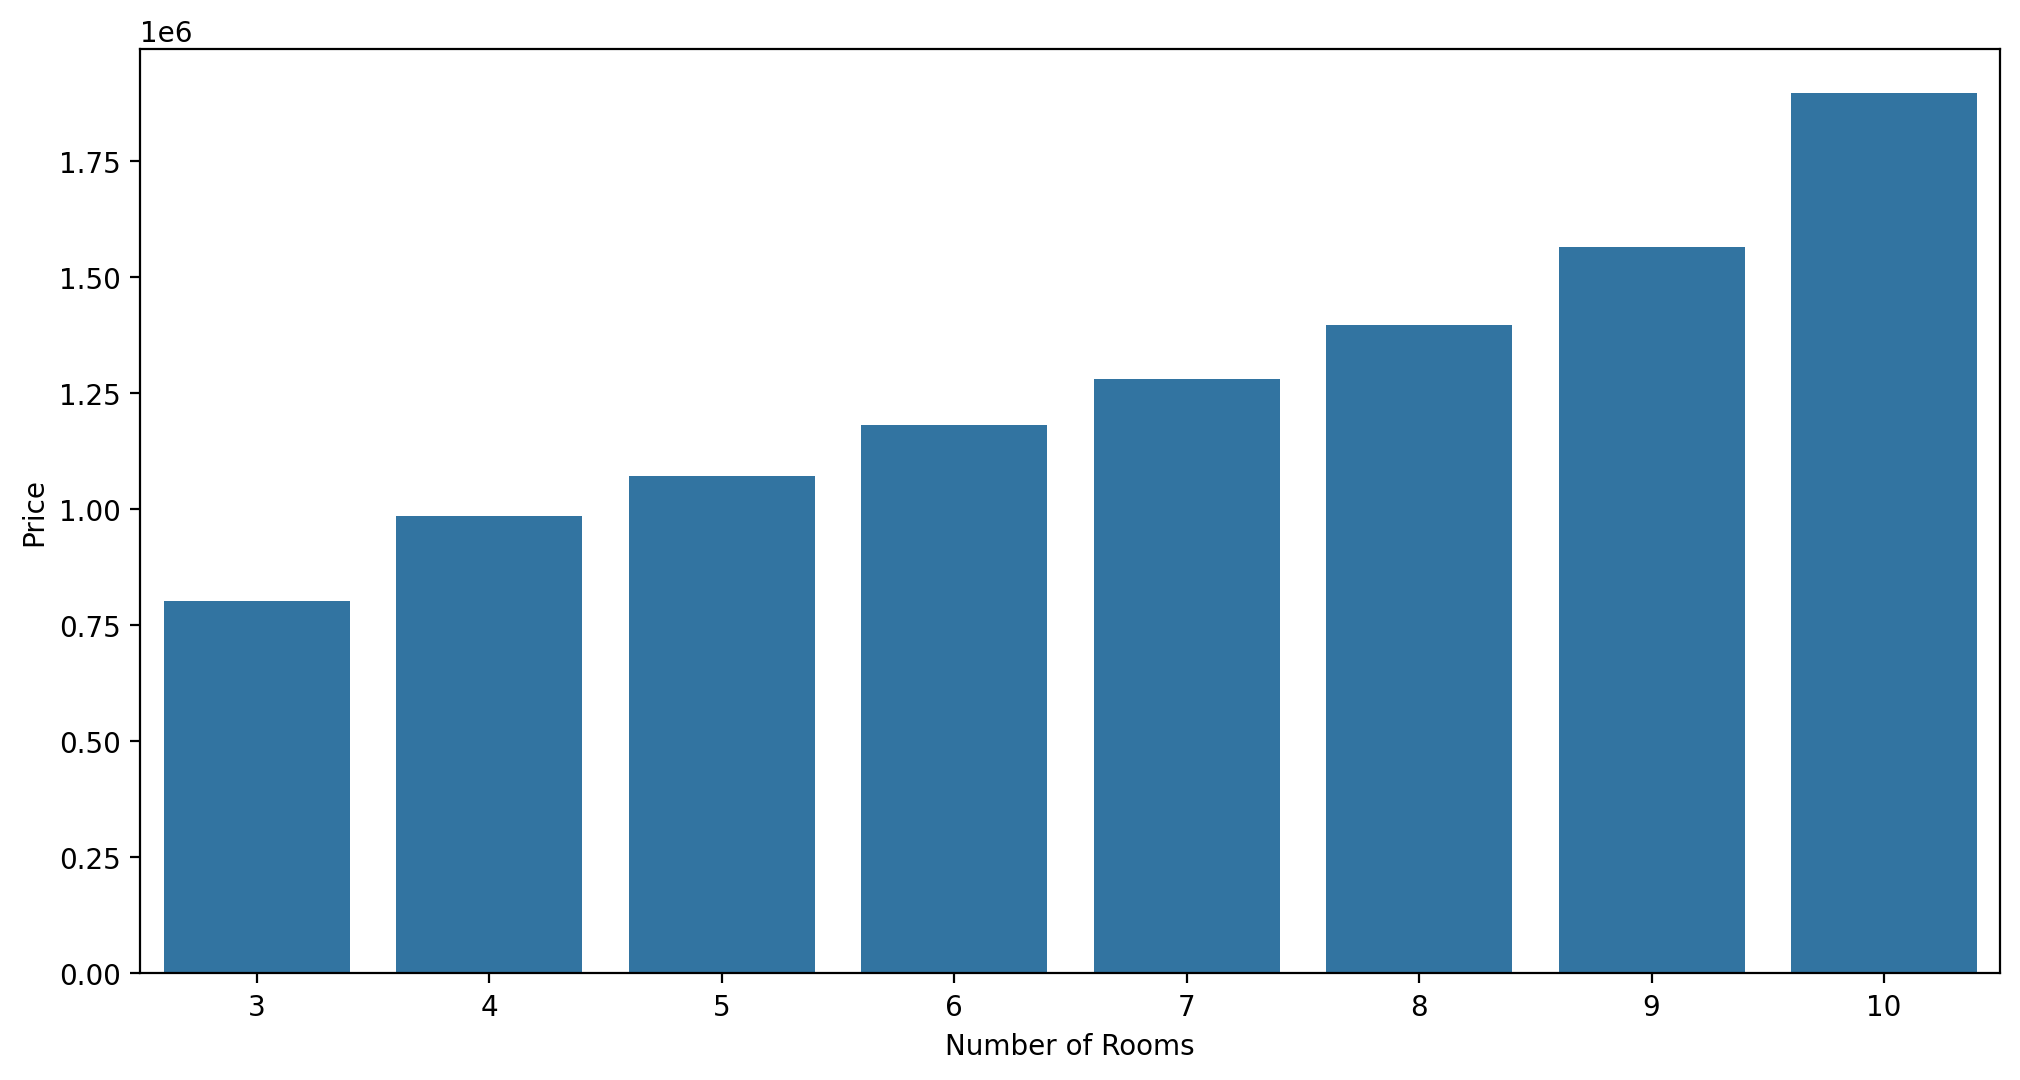

In [20]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Rooms', y = 'Price', data = df, ci = None)

In [21]:
df['Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].apply(int)

<Axes: xlabel='Number of Bedrooms', ylabel='Price'>

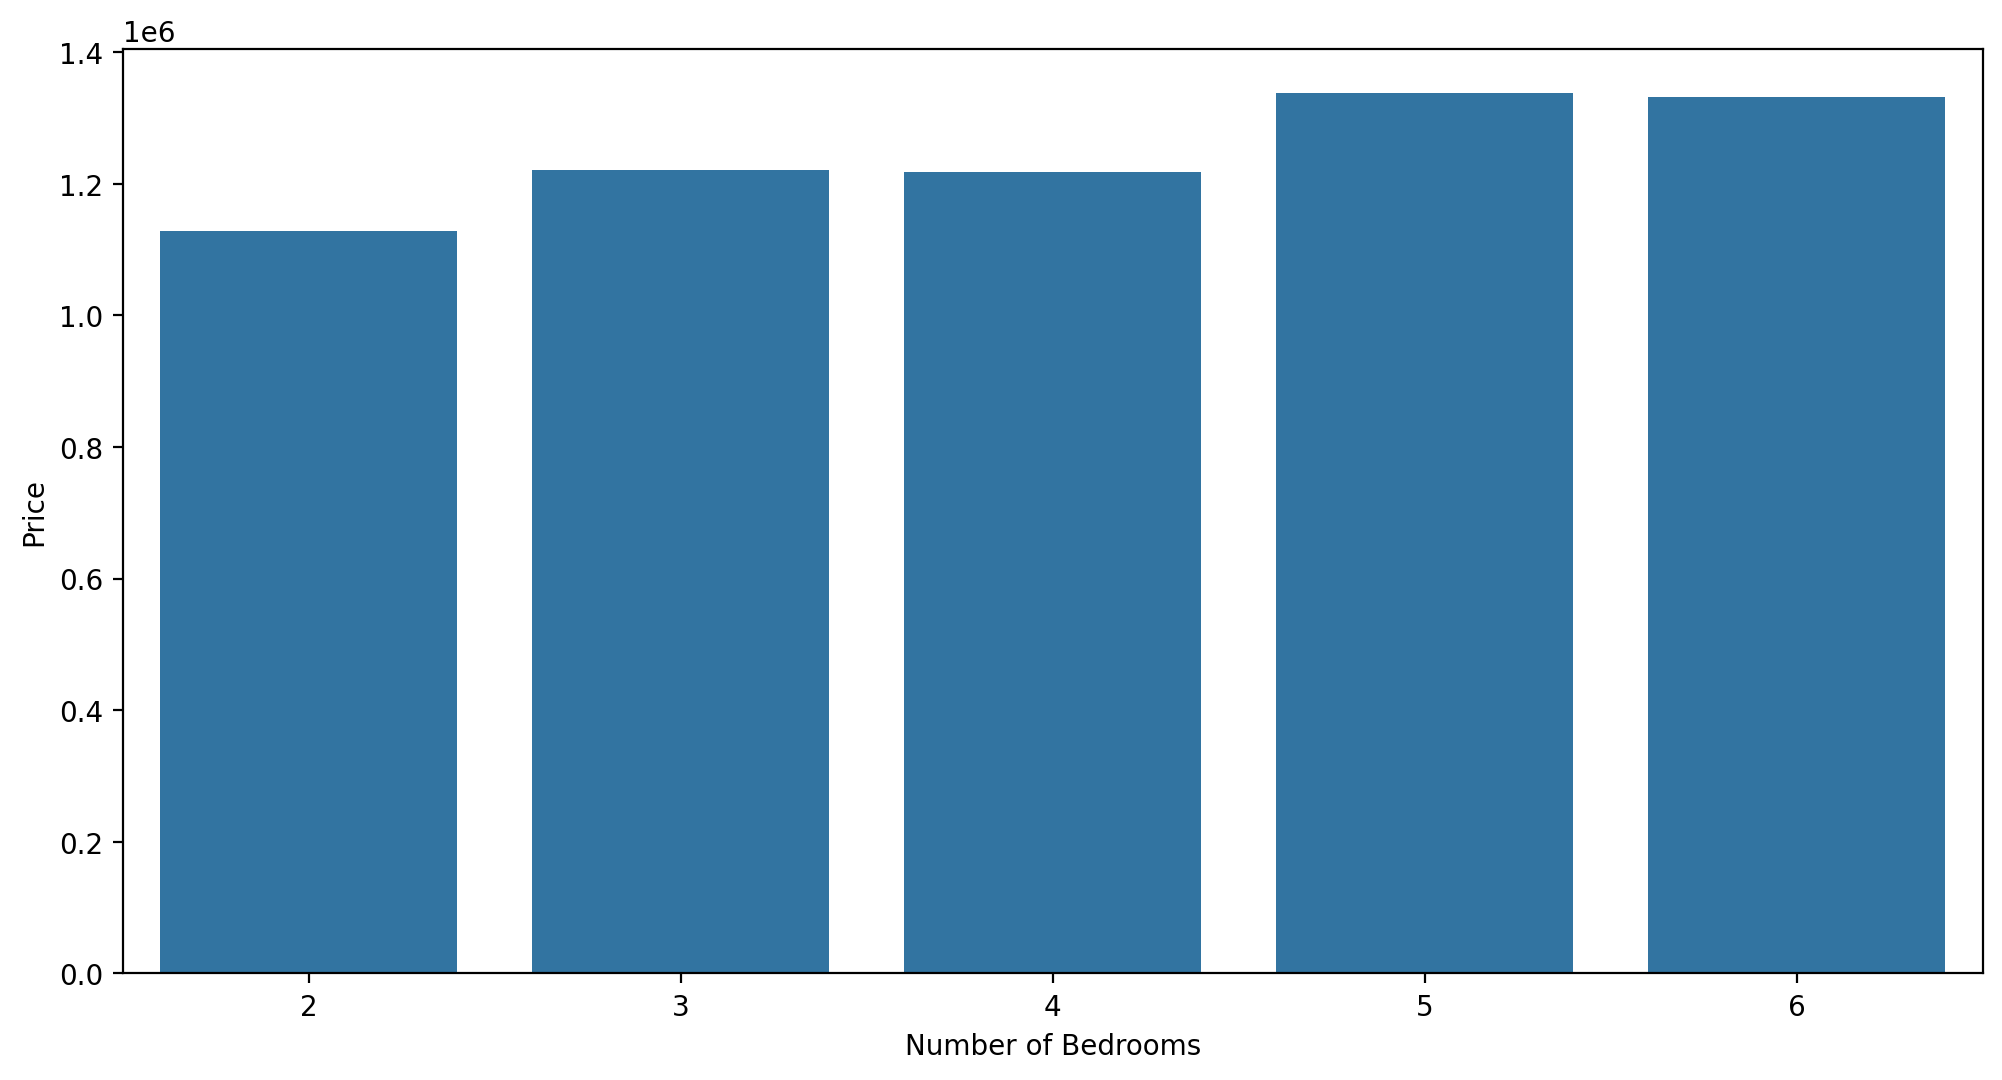

In [22]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Bedrooms', y = 'Price', data = df, ci = None)

### Обучение модели линейной регрессии

In [23]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address',
       'House Age', 'Number of Rooms', 'Number of Bedrooms'],
      dtype='object')

In [24]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [25]:
y = df['Price']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Линейная регрессия

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
lrm.intercept_

np.float64(-2638673.4261909956)

In [32]:
lrm.coef_

array([2.16257989e+01, 1.65590393e+05, 1.19827783e+05, 2.36109526e+03,
       1.52165814e+01])

In [33]:
predictions = lrm.predict(X_test)

In [34]:
predictions

array([1308536.13592613, 1237122.7274647 , 1243835.62817072, ...,
       1457119.79297235, 1483428.95309343, 1047510.59737188],
      shape=(1500,))

In [35]:
y_test.round(3)

1501   1339096.0770
2586   1251794.1790
2653   1340094.9660
1055   1431507.6230
705    1042373.5240
           ...     
3563   1348221.7650
1538   1309937.3990
1837   1472887.2470
2380   1409762.1190
1912   1009606.2840
Name: Price, Length: 1500, dtype: float64

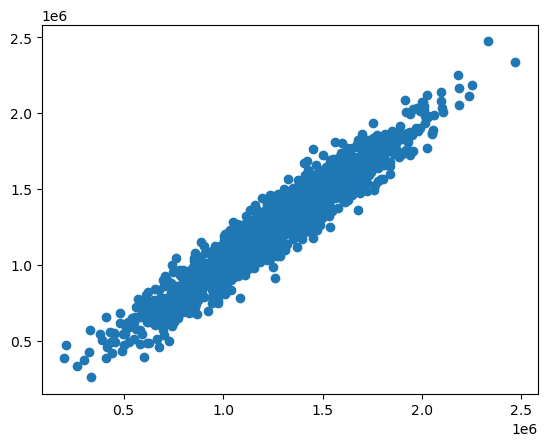

In [36]:
plt.scatter(y_test, predictions)

<Axes: xlabel='Price'>

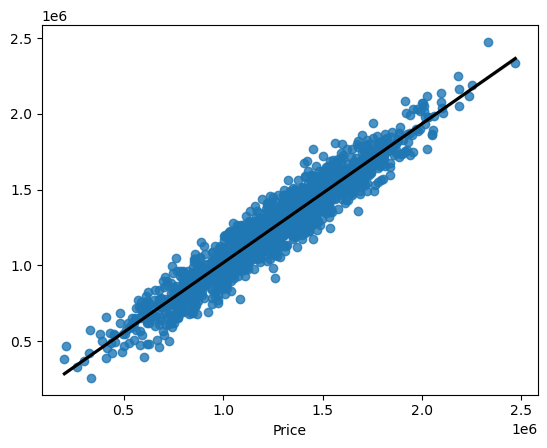

In [37]:
sns.regplot(x=y_test,y=predictions,line_kws={"color":"black"})

<Axes: xlabel='Price', ylabel='Density'>

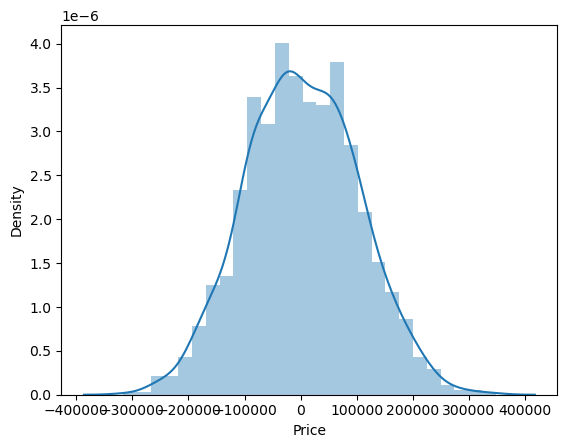

In [38]:
sns.distplot((y_test - predictions))

### Метрики оценки качества регрессии


Общие показатели оценки для задач регрессии:

**Mean Absolute Error** (MAE Средняя абсолютная ошибка) - это среднее значение абсолютного значения ошибок:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE Среднеквадратическая ошибка) - это среднее значение квадратов ошибок:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE Среднеквадратическая ошибка) - это квадратный корень из среднего квадрата ошибок:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Коэффициент детерминации** $R^{2}$

$$R^2 = 1 - \frac{\frac{1}{n}\sum^{n}_{i}{(y - y_{pred})^2}}{\frac{1}{n}\sum^{n}_{i}{(y - \bar{y})^2}}$$

In [39]:
from sklearn import metrics

In [40]:
metrics.mean_absolute_error(y_test, predictions)

81135.56609336879

In [41]:
metrics.mean_squared_error(y_test, predictions)

10068422551.401012

In [42]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

np.float64(100341.52954485502)

In [43]:
metrics.r2_score(y_test, predictions)

0.9146818498754005

### Создание нейронной сети

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# Создание и обучение нейронной сети
nn_model = MLPRegressor(
    hidden_layer_sizes=(100, 50, 25),  # архитектура сети: 3 скрытых слоя
    activation='relu',
    solver='adam',
    alpha=0.001,  # регуляризация L2
    batch_size=32,
    learning_rate='adaptive',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

In [47]:
print("Обучение нейронной сети...")
nn_model.fit(X_train_scaled, y_train)

Обучение нейронной сети...


,loss,'squared_error'
,hidden_layer_sizes,"(100, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.001
,batch_size,32
,learning_rate,'adaptive'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True


In [48]:
nn_predictions = nn_model.predict(X_test_scaled)

### Создание XGBoost Regressor

In [51]:
# Создание и обучение XGBoost
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
    n_jobs=-1,
    eval_metric='rmse',
    early_stopping_rounds=20
)

In [52]:
# Обучение XGBoost
print("Обучение XGBoost...")
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

Обучение XGBoost...


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,20
,enable_categorical,False
,eval_metric,'rmse'


In [53]:
xgb_predictions = xgb_model.predict(X_test)

### Сравнение моделей

In [54]:
def evaluate_model(name, y_true, y_pred):
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_true, y_pred)
    
    return {
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R² Score': r2
    }

In [55]:
results = []

In [56]:
lr_results = evaluate_model('Linear Regression', y_test, predictions)
results.append(lr_results)

nn_results = evaluate_model('Neural Network', y_test, nn_predictions)
results.append(nn_results)

xgb_results = evaluate_model('XGBoost', y_test, xgb_predictions)
results.append(xgb_results)

In [58]:
results_df = pd.DataFrame(results)
print("СРАВНЕНИЕ МОДЕЛЕЙ")
print("="*60)
print(results_df.to_string(index=False, float_format=lambda x: f"{x:.2f}"))

СРАВНЕНИЕ МОДЕЛЕЙ
            Model      MAE            MSE      RMSE  R² Score
Linear Regression 81135.57 10068422551.40 100341.53      0.91
   Neural Network 81861.89 10338723272.13 101679.51      0.91
          XGBoost 88006.74 12115928229.82 110072.38      0.90


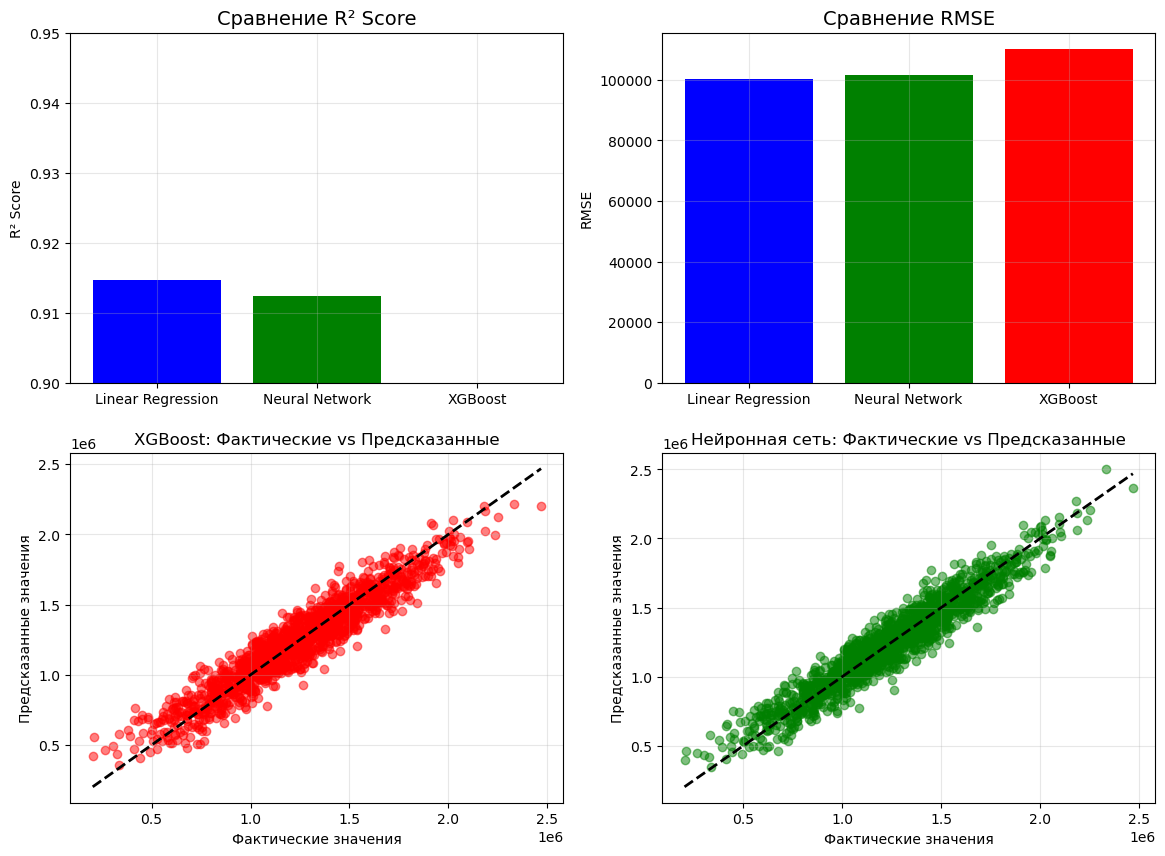

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# График 1: Сравнение R²
axes[0, 0].bar(results_df['Model'], results_df['R² Score'], color=['blue', 'green', 'red'])
axes[0, 0].set_title('Сравнение R² Score', fontsize=14)
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_ylim(0.9, 0.95)
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].bar(results_df['Model'], results_df['RMSE'], color=['blue', 'green', 'red'])
axes[0, 1].set_title('Сравнение RMSE', fontsize=14)
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].scatter(y_test, xgb_predictions, alpha=0.5, color='red')
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[1, 0].set_xlabel('Фактические значения')
axes[1, 0].set_ylabel('Предсказанные значения')
axes[1, 0].set_title('XGBoost: Фактические vs Предсказанные')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].scatter(y_test, nn_predictions, alpha=0.5, color='green')
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[1, 1].set_xlabel('Фактические значения')
axes[1, 1].set_ylabel('Предсказанные значения')
axes[1, 1].set_title('Нейронная сеть: Фактические vs Предсказанные')
axes[1, 1].grid(True, alpha=0.3)

In [64]:
print("АНАЛИЗ ОШИБОК ПО МОДЕЛЯМ")
print("="*60)

for model_name, preds in [('Linear Regression', predictions),
                          ('Neural Network', nn_predictions),
                          ('XGBoost', xgb_predictions)]:
    errors = y_test - preds
    print(f"\n{model_name}:")
    print(f"  Средняя ошибка: {errors.mean():.2f}")
    print(f"  Стандартное отклонение ошибок: {errors.std():.2f}")
    print(f"  Минимальная ошибка: {errors.min():.2f}")
    print(f"  Максимальная ошибка: {errors.max():.2f}")

АНАЛИЗ ОШИБОК ПО МОДЕЛЯМ

Linear Regression:
  Средняя ошибка: 2646.72
  Стандартное отклонение ошибок: 100340.07
  Минимальная ошибка: -316529.77
  Максимальная ошибка: 347692.07

Neural Network:
  Средняя ошибка: -1053.91
  Стандартное отклонение ошибок: 101707.96
  Минимальная ошибка: -321492.34
  Максимальная ошибка: 359871.09

XGBoost:
  Средняя ошибка: 1581.95
  Стандартное отклонение ошибок: 110097.71
  Минимальная ошибка: -349814.46
  Максимальная ошибка: 351625.12


In [65]:
print("ВАЖНОСТЬ ПРИЗНАКОВ (XGBoost)")
print("="*60)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

ВАЖНОСТЬ ПРИЗНАКОВ (XGBoost)
                     Feature  Importance
            Avg. Area Income      0.4426
         Avg. Area House Age      0.2410
             Area Population      0.1816
   Avg. Area Number of Rooms      0.1183
Avg. Area Number of Bedrooms      0.0164


## Основные результаты
- На основе проведенного анализа трех моделей для прогнозирования цен на недвижимость можно сказать следующее:

### Сравнение эффективности моделей

1. Лучшей моделью оказалась Линейная регрессия, которая показала:
- Наивысший R² Score: 0.91 - модель объясняет 91% дисперсии данных
- Наименьшую ошибку RMSE: 100,341.53 - среднее отклонение предсказаний от фактических значений
- Наименьшую MAE: 81,135.57 - средняя абсолютная ошибка

2. Нейронная сеть показала схожую, но немного худшую производительность:
- R² Score: 0.91 (такой же, как у линейной регрессии)
- RMSE: 101,679.51 (на 1,338 единиц хуже)
- MAE: 81,861.89 (на 726 единиц хуже)

3. XGBoost показал наихудшие результаты:
- R² Score: 0.90 - объясняет только 90% дисперсии
- RMSE: 110,072.38 (на 9,730 единиц хуже линейной регрессии)
- MAE: 88,006.74 (на 6,871 единиц хуже)

### Анализ ошибок
Статистика ошибок подтверждает лидерство линейной регрессии:

1. Линейная регрессия имеет наиболее сбалансированное распределение ошибок (средняя ошибка 2,647, стандартное отклонение 100,340)

2. Нейронная сеть имеет небольшую систематическую ошибку (-1,054)

3. XGBoost показывает наибольший разброс ошибок (стандартное отклонение 110,098)

### Интерпретируемость моделей
XGBoost предоставляет важную аналитику признаков:

Avg. Area Income (44.26%) - самый значимый фактор

Avg. Area House Age (24.10%) - второй по важности

Area Population (18.16%) - третий значимый фактор

Avg. Area Number of Rooms (11.83%)

Avg. Area Number of Bedrooms (1.64%) - наименее значимый

## Итог

### Линейная регрессия демонстрирует наилучшее соотношение точности и простоты для данной задачи прогнозирования цен на недвижимость. Несмотря на свою простоту, она превосходит более сложные модели (нейронные сети и градиентный бустинг).